In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from constants import *

In [4]:
import pylab

In [5]:
pareto_front_df = pd.read_csv('%s/arbor_stats.csv' % STATISTICS_DIR, skipinitialspace=True)
pareto_front_df

,arbor name,pareto front distance,pareto front location
0,087_1_C_day4,2.023706,1.00
1,084_2_C_day2,0.213441,1.00
2,043_5_S_day5,0.029891,0.88
3,093_1_C_day2,0.447800,1.00
4,078_1_C_day4,0.161652,0.61
...,...,...,...
7050,M058_9_S_loga_day9,0.248150,0.67
7051,M248_9_C_loga_day9,3.983962,0.23
7052,LA1511_8_S_noga_day9,4.399954,1.00
7053,M058_10_C_higa_day9,4.476733,1.00


In [6]:
scaling_df = pd.read_csv('%s/scaling_distances.csv' % STATISTICS_DIR, skipinitialspace=True)
pareto_front_df = pd.merge(pareto_front_df, scaling_df)
pareto_front_df

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location
0,087_1_C_day4,2.023706,1.00,1.072667,0.83
1,084_2_C_day2,0.213441,1.00,1.036260,0.95
2,043_5_S_day5,0.029891,0.88,1.004686,0.88
3,093_1_C_day2,0.447800,1.00,1.057325,0.70
4,078_1_C_day4,0.161652,0.61,1.024057,0.61
...,...,...,...,...,...
6962,M058_9_S_loga_day9,0.248150,0.67,1.017250,0.56
6963,M248_9_C_loga_day9,3.983962,0.23,1.102723,0.27
6964,LA1511_8_S_noga_day9,4.399954,1.00,1.105396,0.34
6965,M058_10_C_higa_day9,4.476733,1.00,1.163066,0.63


In [7]:
dist_column = 'pareto front scaling distance'
loc_column = 'pareto front scaling location'

In [8]:
CONDITIONS = {'S' : 'Salt', 'C': 'Control'}

In [9]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df['condition'] = metadata_df['condition'].map(CONDITIONS)
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
0,PimpiBig4,103_4_S_day5,5,297,103,4,Salt,None
1,PimpiBig4,031_3_S_day5,5,278,031,3,Salt,None
2,PimpiBig4,055_2_S_day5,5,151,055,2,Salt,None
3,PimpiBig4,098_1_S_day5,5,14,098,1,Salt,None
4,PimpiBig4,101_1_S_day5,5,106,101,1,Salt,None
...,...,...,...,...,...,...,...,...
9468,PimpiBig6,053_1_C_day5,5,226,053,1,Control,None
9469,PimpiBig6,045_2_C_day5,5,227,045,2,Control,None
9470,PimpiBig6,045_3_S_day5,5,228,045,3,Salt,None
9471,PimpiBig6,053_2_S_day5,5,229,053,2,Salt,None


In [10]:
metadata_df = metadata_df[metadata_df['hormone'] != 'None']
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
1382,PimpiGA,M248_1_C_noga_day5,5,1,M248,1,Control,noga
1383,PimpiGA,M248_2_C_noga_day5,5,2,M248,2,Control,noga
1384,PimpiGA,M248_3_C_noga_day5,5,3,M248,3,Control,noga
1385,PimpiGA,M248_4_C_noga_day5,5,4,M248,4,Control,noga
1386,PimpiGA,M248_5_C_noga_day5,5,5,M248,5,Control,noga
...,...,...,...,...,...,...,...,...
8420,PimpiCyto,M058_5_S_nocyto_day9,9,172,M058,5,Salt,nocyto
8421,PimpiCyto,M058_4_S_nocyto_day9,9,173,M058,4,Salt,nocyto
8422,PimpiCyto,M058_3_S_nocyto_day9,9,174,M058,3,Salt,nocyto
8423,PimpiCyto,M058_2_S_nocyto_day9,9,175,M058,2,Salt,nocyto


In [11]:
arbor_stats_df = pd.merge(pareto_front_df, metadata_df)
arbor_stats_df

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location,experiment,day,Picture #,genotype,replicate,condition,hormone
0,248_9_S_noiaa_day9,1.934651,0.93,1.089103,0.72,PimpiIAA1,9,46,248,9,Salt,noiaa
1,248_5_S_iaa_day9,11.208500,1.00,1.252299,0.36,PimpiIAA1,9,5,248,5,Salt,iaa
2,1511_4_S_iaa_day9,5.853187,0.88,1.085219,0.48,PimpiIAA1,9,122,1511,4,Salt,iaa
3,058_9_C_noiaa_day9,4.601898,0.89,1.086100,0.59,PimpiIAA1,9,116,058,9,Control,noiaa
4,1511_6_C_iaa_day5,0.364193,1.00,1.183724,1.00,PimpiIAA1,5,134,1511,6,Control,iaa
...,...,...,...,...,...,...,...,...,...,...,...,...
695,M058_9_S_loga_day9,0.248150,0.67,1.017250,0.56,PimpiGA,9,109,M058,9,Salt,loga
696,M248_9_C_loga_day9,3.983962,0.23,1.102723,0.27,PimpiGA,9,29,M248,9,Control,loga
697,LA1511_8_S_noga_day9,4.399954,1.00,1.105396,0.34,PimpiGA,9,181,LA1511,8,Salt,noga
698,M058_10_C_higa_day9,4.476733,1.00,1.163066,0.63,PimpiGA,9,100,M058,10,Control,higa


<AxesSubplot:xlabel='hormone', ylabel='pareto front scaling location'>

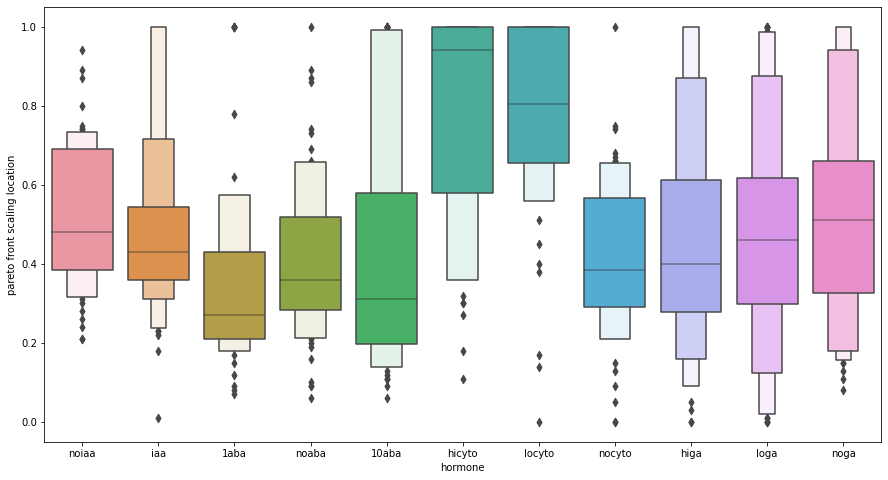

In [12]:
pylab.figure(figsize=(15,8))
sns.boxenplot(x='hormone', y=loc_column, data=arbor_stats_df)

<AxesSubplot:xlabel='hormone', ylabel='pareto front scaling location'>

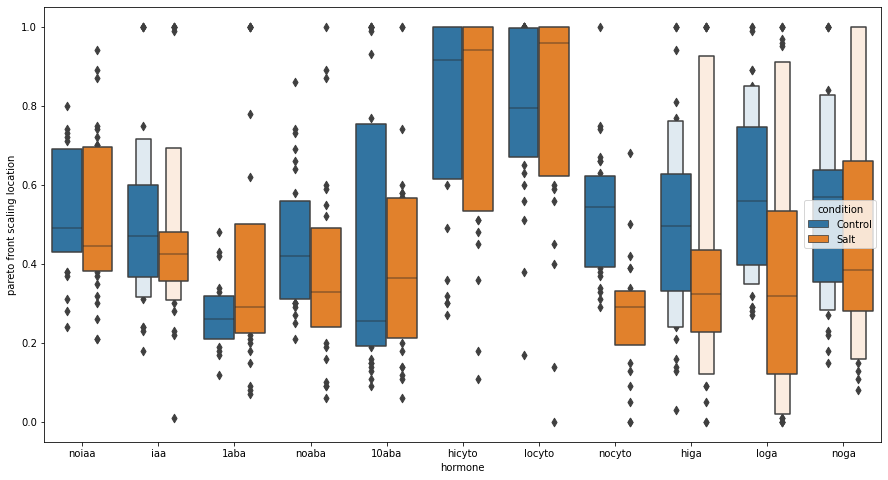

In [13]:
pylab.figure(figsize=(15,8))
sns.boxenplot(x='hormone', y=loc_column, hue='condition', data=arbor_stats_df, hue_order=['Control', 'Salt'])

<AxesSubplot:xlabel='hormone', ylabel='pareto front scaling distance'>

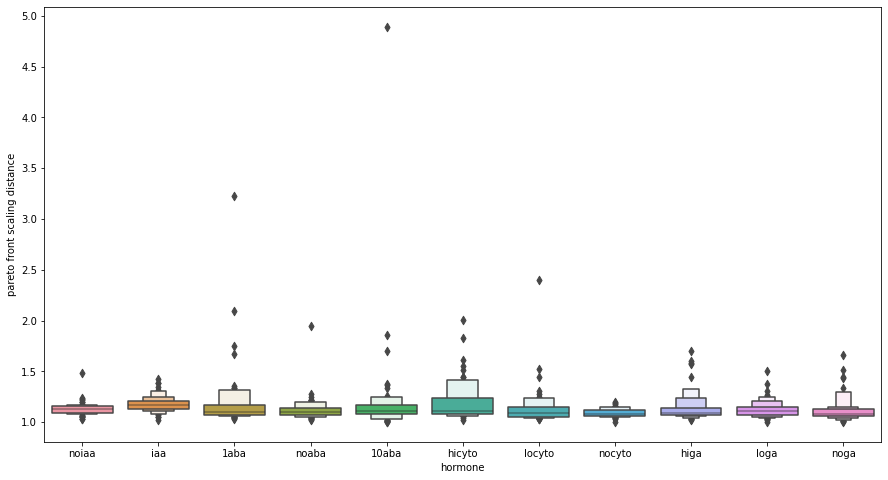

In [14]:
pylab.figure(figsize=(15,8))
sns.boxenplot(x='hormone', y=dist_column, data=arbor_stats_df)

<AxesSubplot:xlabel='hormone', ylabel='pareto front scaling distance'>

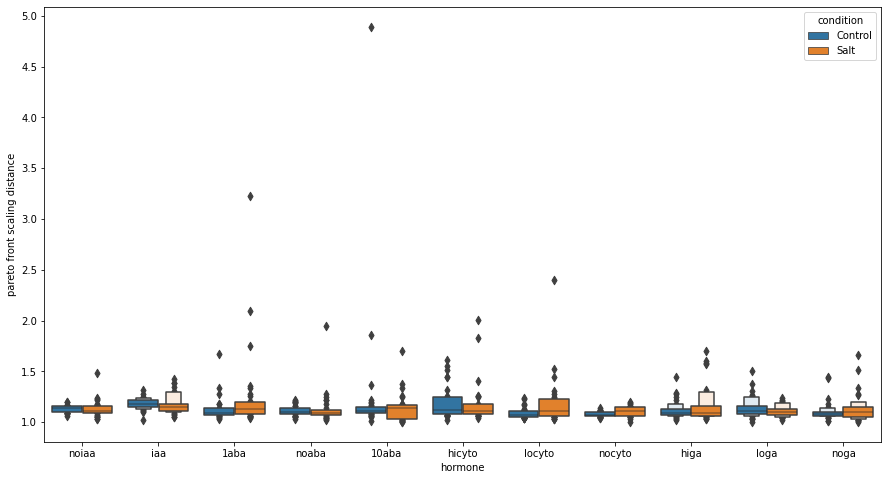

In [15]:
pylab.figure(figsize=(15,8))
sns.boxenplot(x='hormone', y=dist_column, hue='condition', data=arbor_stats_df, hue_order=['Control', 'Salt'])

In [16]:
from scipy.stats import mannwhitneyu

In [17]:
noiaa_control = arbor_stats_df[(arbor_stats_df['condition'] == 'Control') & (arbor_stats_df['hormone'] == 'noiaa')]['pareto front scaling distance']

In [18]:
noiaa_salt = arbor_stats_df[(arbor_stats_df['condition'] == 'Salt') & (arbor_stats_df['hormone'] == 'noiaa')]['pareto front scaling distance']

In [19]:
iaa_control = arbor_stats_df[(arbor_stats_df['condition'] == 'Control') & (arbor_stats_df['hormone'] == 'iaa')]['pareto front scaling distance']

In [20]:
iaa_salt = arbor_stats_df[(arbor_stats_df['condition'] == 'Salt') & (arbor_stats_df['hormone'] == 'iaa')]['pareto front scaling distance']

In [21]:
mannwhitneyu(noiaa_control, noiaa_salt)

MannwhitneyuResult(statistic=316.0, pvalue=0.16137304485851356)

In [22]:
mannwhitneyu(iaa_control, iaa_salt)

MannwhitneyuResult(statistic=547.0, pvalue=0.036362541741252634)

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
arbor_stats_df['alpha'] = arbor_stats_df[loc_column]
md = smf.mixedlm("alpha ~ hormone*condition",
                 data=arbor_stats_df, groups=arbor_stats_df['hormone'])

In [25]:
mdf = md.fit()

In [26]:
print(mdf.summary())

                      Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          alpha   
No. Observations:          700              Method:                      REML    
No. Groups:                11               Scale:                       0.0606  
Min. group size:           50               Log-Likelihood:              -49.3863
Max. group size:           84               Converged:                   Yes     
Mean group size:           63.6                                                  
---------------------------------------------------------------------------------
                                    Coef.    Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                            0.437       0.250  1.745 0.081 -0.054  0.927
hormone[T.1aba]                     -0.163       0.355 -0.459 0.646 -0.859  0.532
hormone[T.hicyto]                    0

In [27]:
import scikit_posthocs as sp

In [28]:
sp.posthoc_mannwhitney(arbor_stats_df, val_col='alpha', group_col='hormone')

,10aba,1aba,hicyto,higa,iaa,locyto,loga,noaba,nocyto,noga,noiaa
10aba,1.000000e+00,6.465592e-01,6.509154e-08,1.939925e-01,5.892534e-03,1.109861e-08,1.017934e-01,3.509220e-01,4.530488e-01,1.492781e-02,1.913767e-03
1aba,6.465592e-01,1.000000e+00,3.092403e-10,1.208661e-02,1.061532e-05,5.364183e-11,1.636167e-03,2.178307e-02,3.911885e-02,2.364938e-04,2.658899e-06
hicyto,6.509154e-08,3.092403e-10,1.000000e+00,2.475384e-08,1.852565e-07,9.905495e-01,3.622748e-08,5.973863e-10,2.466033e-09,3.732032e-06,1.011272e-06
higa,1.939925e-01,1.208661e-02,2.475384e-08,1.000000e+00,1.844887e-01,3.226828e-10,4.874093e-01,5.357982e-01,5.149847e-01,1.323899e-01,1.914137e-02
iaa,5.892534e-03,1.061532e-05,1.852565e-07,1.844887e-01,1.000000e+00,1.880338e-10,8.042470e-01,3.919877e-02,4.990994e-02,5.876335e-01,9.391196e-02
locyto,1.109861e-08,5.364183e-11,9.905495e-01,3.226828e-10,1.880338e-10,1.000000e+00,6.547472e-10,5.868994e-12,7.787162e-12,3.976827e-08,9.919603e-09
loga,1.017934e-01,1.636167e-03,3.622748e-08,4.874093e-01,8.042470e-01,6.547472e-10,1.000000e+00,1.372337e-01,1.503982e-01,3.805141e-01,1.817034e-01
noaba,3.509220e-01,2.178307e-02,5.973863e-10,5.357982e-01,3.919877e-02,5.868994e-12,1.372337e-01,1.000000e+00,9.877059e-01,2.540563e-02,2.172754e-03
nocyto,4.530488e-01,3.911885e-02,2.466033e-09,5.149847e-01,4.990994e-02,7.787162e-12,1.503982e-01,9.877059e-01,1.000000e+00,3.375596e-02,1.607846e-03
noga,1.492781e-02,2.364938e-04,3.732032e-06,1.323899e-01,5.876335e-01,3.976827e-08,3.805141e-01,2.540563e-02,3.375596e-02,1.000000e+00,4.036476e-01
